In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [15]:
# Set the style for matplotlib
plt.style.use('default')

# Generate sample sales data
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
sales_data = {
    'Date': dates,
    'Sales': np.random.normal(1000, 200, len(dates)),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], len(dates)),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], len(dates))
}

# Create DataFrame
df = pd.DataFrame(sales_data)

# Basic data cleaning and preparation
df['Sales'] = df['Sales'].clip(lower=0)  # Remove negative sales
df['Month'] = df['Date'].dt.strftime('%Y-%m')
df['DayOfWeek'] = df['Date'].dt.day_name()

In [16]:
# 1. Basic Statistical Analysis
print("Basic Statistical Analysis:")
print("\nSummary Statistics:")
print(df['Sales'].describe())

Basic Statistical Analysis:

Summary Statistics:
count     366.000000
mean     1001.764599
std       189.399082
min       351.746532
25%       869.420598
50%      1010.378056
75%      1125.056093
max      1770.546298
Name: Sales, dtype: float64


In [17]:
# Monthly analysis
monthly_sales = df.groupby('Month')['Sales'].agg(['mean', 'sum', 'count'])
print("\nMonthly Sales Analysis:")
print(monthly_sales)


Monthly Sales Analysis:
                mean           sum  count
Month                                    
2024-01   959.702494  29750.777302     31
2024-02   979.081603  28393.366501     29
2024-03  1003.120134  31096.724145     31
2024-04  1000.576037  30017.281120     30
2024-05   980.368811  30391.433129     31
2024-06  1050.234449  31507.033476     30
2024-07  1031.353017  31971.943536     31
2024-08   995.123317  30848.822831     31
2024-09   976.082441  29282.473233     30
2024-10  1012.798336  31396.748426     31
2024-11  1053.154356  31594.630666     30
2024-12   980.471255  30394.608900     31


In [18]:
# 2. Category Analysis
category_analysis = df.groupby('Category')['Sales'].agg(['mean', 'sum', 'count'])
print("\nCategory Analysis:")
print(category_analysis)


Category Analysis:
                    mean            sum  count
Category                                      
Books         999.682105   77975.204156     78
Clothing     1008.363000   96802.848002     96
Electronics  1006.046905  103622.831205    103
Food          991.516403   88244.959905     89


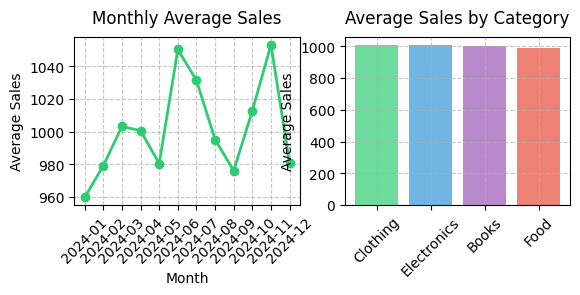

In [11]:
# Custom colors
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']

# Plot 1: Monthly Sales Trend (top-left)
ax1 = plt.subplot(2, 2, 1)
monthly_avg = df.groupby('Month')['Sales'].mean()
ax1.plot(monthly_avg.index, monthly_avg.values, marker='o', color='#2ecc71', linewidth=2)
ax1.set_title('Monthly Average Sales', pad=10)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sales')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot 2: Sales by Category (top-right)
ax2 = plt.subplot(2, 2, 2)
category_means = df.groupby('Category')['Sales'].mean().sort_values(ascending=False)
bars = ax2.bar(category_means.index, category_means.values, color=colors, alpha=0.7)
ax2.set_title('Average Sales by Category', pad=10)
ax2.set_ylabel('Average Sales')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=45)

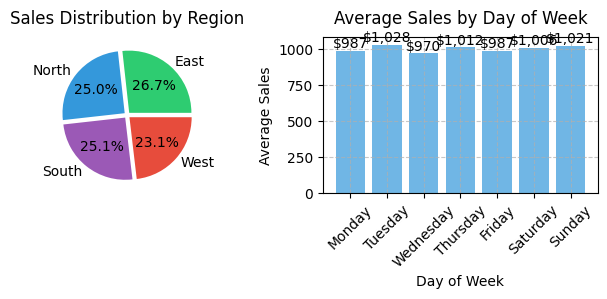

In [14]:
#Sales by Region (bottom-left)
ax3 = plt.subplot(2, 2, 3)
region_sales = df.groupby('Region')['Sales'].sum()
ax3.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%',
        colors=colors, explode=[0.05]*4)
ax3.set_title('Sales Distribution by Region', pad=10)

# Plot 4: Day of Week Analysis (bottom-right)
ax4 = plt.subplot(2, 2, 4)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df.groupby('DayOfWeek')['Sales'].mean().reindex(day_order)
bars = ax4.bar(daily_avg.index, daily_avg.values, color='#3498db', alpha=0.7)
ax4.set_title('Average Sales by Day of Week', pad=10)
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Average Sales')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Advanced Analysis: Rolling Average and Seasonality
df['7_Day_MA'] = df.groupby('Category')['Sales'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

In [13]:
# Print insights
print("\nKey Insights:")
print(f"1. Best performing category: {category_analysis['sum'].idxmax()}")
print(f"2. Average daily sales: ${df['Sales'].mean():.2f}")
print(f"3. Most active region: {df.groupby('Region')['Sales'].sum().idxmax()}")
print(f"4. Best selling day: {df.groupby('DayOfWeek')['Sales'].mean().idxmax()}")


Key Insights:
1. Best performing category: Electronics
2. Average daily sales: $1001.76
3. Most active region: East
4. Best selling day: Tuesday
